<a href="https://colab.research.google.com/github/codelalala/MLFS/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
iris=datasets.load_iris()

In [7]:
data=iris['data'][:,:2]

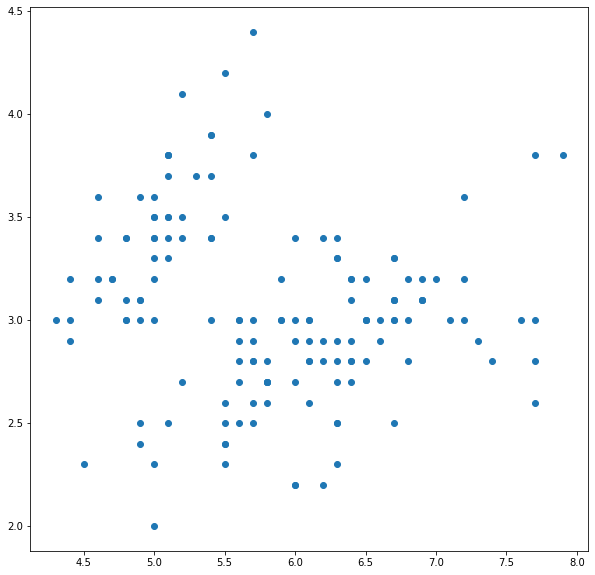

In [19]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(data[:,0],data[:,1])

In [73]:
#this is where I implement K_means
def distance(point1,point2):
    return np.sum((point1-point2)**2,axis=0)

def initialize(k):
    cache=set()
    while len(cache)<k:
        i=np.random.randint(0,len(data))
        cache.add(i)
    return [data[i] for i in cache]

def assign_clusters(k,centers):
    clusters=[[] for _ in range(k)]
    for point in data:
        dists=[distance(point,center) for center in centers]
        cluster_index=np.argmin(dists)
        clusters[cluster_index].append(point)
    return [np.array(cluster) for cluster in clusters]

def update_center(clusters):
    return [np.mean(cluster,axis=0) for cluster in clusters]

In [79]:
num_clusters=3
num_steps=10
step=0
centers=initialize(num_clusters)
while step<num_steps:
    clusters=assign_clusters(num_clusters,centers)
    centers=update_center(clusters)
    step+=1



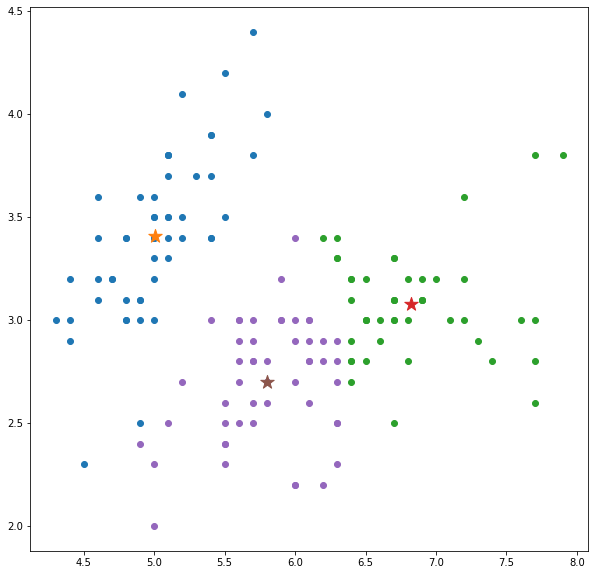

In [83]:
fig,ax=plt.subplots(figsize=(10,10))
# ax.scatter(data[:,0],data[:,1])
# centers=np.array(centers)
# ax.scatter(centers[:,0],centers[:,1])
for i in range(num_clusters):
    ax.scatter(clusters[i][:,0],clusters[i][:,1])
    ax.scatter(centers[i][0],centers[i][1],marker='*',s=200)